Import Necessary Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
for warning in [FutureWarning, DeprecationWarning]:
    warnings.filterwarnings("ignore", category=warning)

Load Dataset

In [15]:
df = pd.read_excel('Financial Sample.xlsx', sheet_name='Sheet1')

Inspect the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

Clean the data

In [17]:
df['Date'] = pd.to_datetime(df['Date']) # convert to datetime
df = df.dropna() # drop missing values
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
53,Government,France,Paseo,Low,3945.0,10,7,27615.0,276.15,27338.85,19725.0,7613.85,2014-01-01,1,January,2014
54,Midmarket,France,Paseo,Low,2296.0,10,15,34440.0,344.40,34095.60,22960.0,11135.60,2014-02-01,2,February,2014
55,Government,France,Paseo,Low,1030.0,10,7,7210.0,72.10,7137.90,5150.0,1987.90,2014-05-01,5,May,2014
56,Government,France,Velo,Low,639.0,120,7,4473.0,44.73,4428.27,3195.0,1233.27,2014-11-01,11,November,2014
57,Government,Canada,VTT,Low,1326.0,250,7,9282.0,92.82,9189.18,6630.0,2559.18,2014-03-01,3,March,2014


Profitability Analysis by Segment and Country

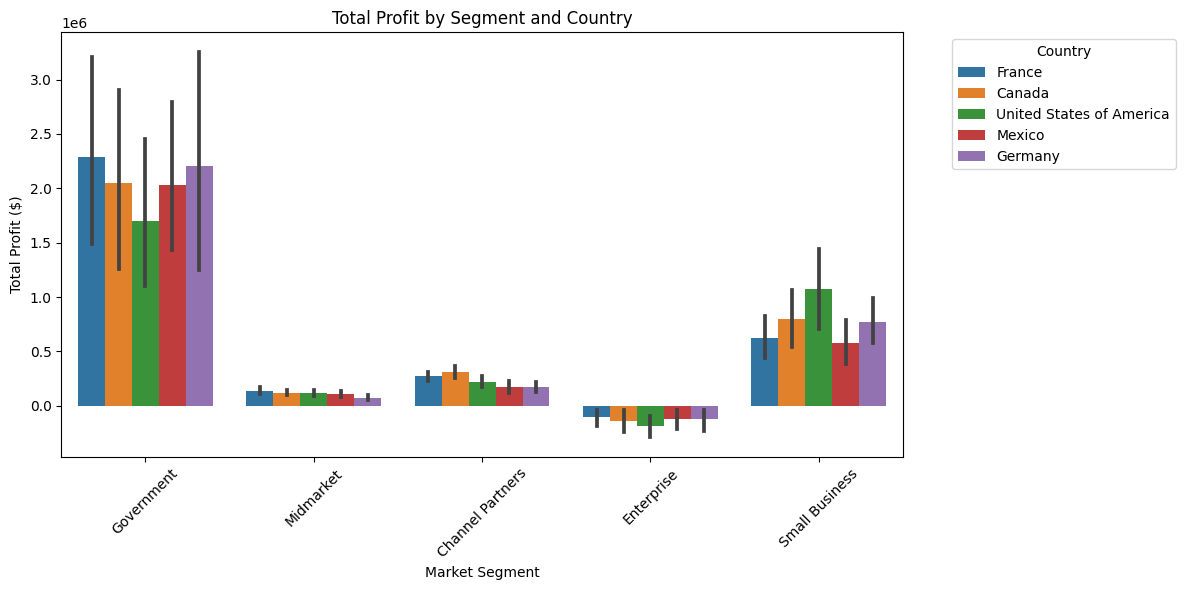

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Segment', y='Profit', hue='Country', estimator=sum)
plt.title('Total Profit by Segment and Country')
plt.xlabel("Market Segment")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

Profit Trends Over Time

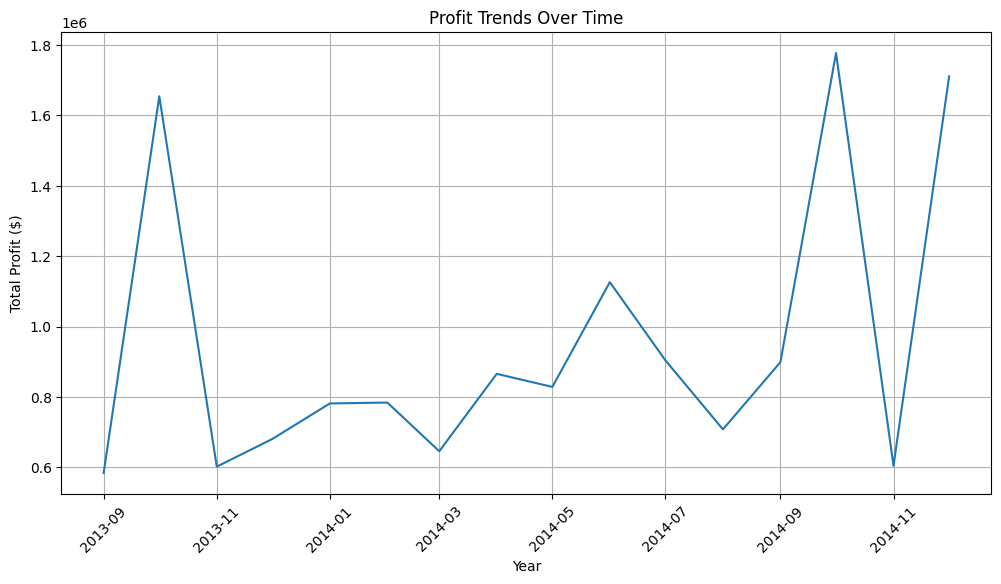

In [19]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("Date")["Profit"].sum().reset_index()
sns.lineplot(data=df_grouped, x='Date', y='Profit')
plt.title("Profit Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Heatmap for Monthly Profit Trends

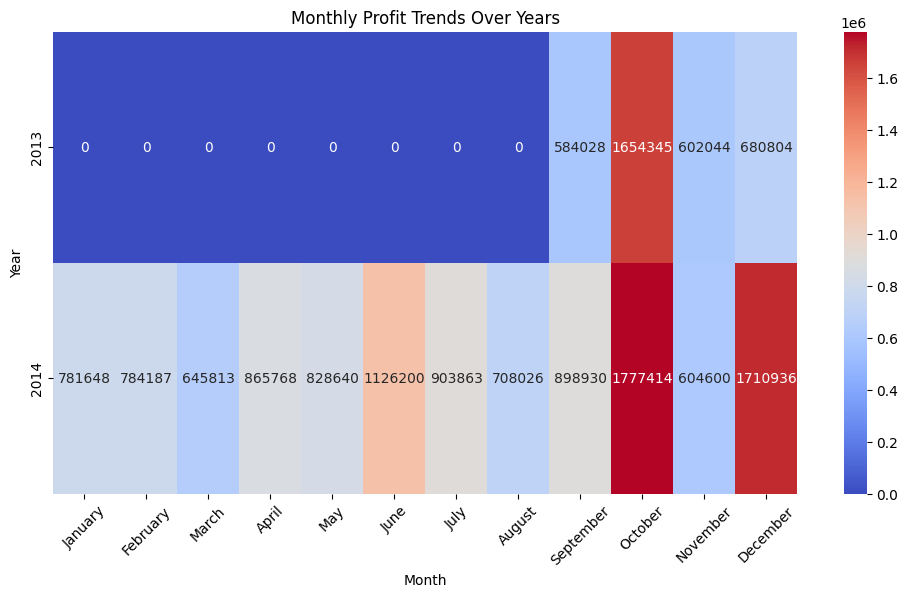

In [24]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df["Month Name"] = pd.Categorical(df["Month Name"], categories=month_order, ordered=True)
df_pivot = df.pivot_table(values="Profit", index="Year", columns="Month Name", aggfunc="sum")
df_pivot = df_pivot.fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Monthly Profit Trends Over Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()